In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir(r"C:\Users\Capta\Documents\GitHub\csgo_econ_viz")

In [3]:
econ_data = pd.read_csv("data/raw/economy.csv", parse_dates=["date"])
results_data = pd.read_csv("data/raw/results.csv", parse_dates=["date"])
players_data = pd.read_parquet("data/raw/players.parquet")

C:\Users\Capta\AppData\Local\Temp\ipykernel_14092\4238222839.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  econ_data = pd.read_csv("data/raw/economy.csv", parse_dates=["date"])


In [4]:
players_data.head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,...,-1.0,72.500000,80.000000,0.93,7.0,9.0,-2.0,70.400002,63.599998,0.89
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,...,3.0,79.500000,53.299999,1.12,4.0,8.0,-4.0,40.700001,54.500000,0.53
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,...,1.0,81.500000,63.599998,1.03,9.0,9.0,0.0,87.900002,73.300003,1.05
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,...,0.0,67.199997,66.699997,0.97,1.0,9.0,-8.0,14.800000,45.500000,0.31
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,...,-1.0,72.900002,81.800003,0.96,8.0,7.0,1.0,56.299999,80.000000,0.99


In [5]:
id_number = 2339402
econ_data.query("match_id == @id_number")

,date,match_id,event_id,team_1,team_2,best_of,_map,t1_start,t2_start,1_t1,...,21_winner,22_winner,23_winner,24_winner,25_winner,26_winner,27_winner,28_winner,29_winner,30_winner
0,2020-03-01,2339402,4901,G2,Natus Vincere,5,Nuke,t,ct,4350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-01,2339402,4901,G2,Natus Vincere,5,Dust2,ct,t,3900.0,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN
2,2020-03-01,2339402,4901,G2,Natus Vincere,5,Mirage,t,ct,4150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

results_data.query("match_id == @id_number")

,date,team_1,team_2,_map,result_1,result_2,map_winner,starting_ct,ct_1,t_2,t_1,ct_2,event_id,match_id,rank_1,rank_2,map_wins_1,map_wins_2,match_winner
658,2020-03-01,G2,Natus Vincere,Mirage,2,16,2,2,1,2,1,14,4901,2339402,8,6,0,3,2
659,2020-03-01,G2,Natus Vincere,Nuke,4,16,2,2,3,2,1,14,4901,2339402,8,6,0,3,2
663,2020-03-01,G2,Natus Vincere,Dust2,13,16,2,1,7,8,6,8,4901,2339402,8,6,0,3,2


In [7]:

team_name = "G2"
players_data.query("team == @team_name").head()

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,m3_kddiff_ct,m3_adr_ct,m3_kast_ct,m3_rating_ct,m3_kills_t,m3_deaths_t,m3_kddiff_t,m3_adr_t,m3_kast_t,m3_rating_t
20,2020-02-26,AmaNEk,G2,mousesports,France,9616,2339384,4901,IEM Katowice 2020,3,...,5.0,111.400002,87.5,1.65,10.0,10.0,0.0,68.099998,60.000000,1.00
21,2020-02-26,JaCkz,G2,mousesports,France,284,2339384,4901,IEM Katowice 2020,3,...,6.0,113.900002,100.0,1.80,5.0,9.0,-4.0,37.299999,60.000000,0.69
24,2020-02-26,huNter-,G2,mousesports,Serbia,3972,2339384,4901,IEM Katowice 2020,3,...,3.0,108.599998,87.5,1.52,13.0,8.0,5.0,89.500000,80.000000,1.29
26,2020-02-26,kennyS,G2,mousesports,France,7167,2339384,4901,IEM Katowice 2020,3,...,2.0,81.199997,100.0,1.33,18.0,9.0,9.0,136.399994,86.699997,2.10
27,2020-02-26,nexa,G2,mousesports,Serbia,9618,2339384,4901,IEM Katowice 2020,3,...,5.0,74.199997,87.5,1.37,11.0,8.0,3.0,60.900002,80.000000,1.41


In [8]:
econ_results_merged = pd.merge(econ_data, results_data, on = ["match_id", "_map"], how = "left")
map = 3
t1_cols = [f"{i}_t1" for i in range(1, 31)]
t2_cols = [f"{i}_t2" for i in range(1, 31)]
econ_results_filtered = econ_results_merged.query("match_id == @id_number")
t1_econ = econ_results_filtered.loc[map -1, t1_cols].dropna()
t2_econ = econ_results_filtered.loc[map- 1, t2_cols].dropna()
t1_econ.index = t1_econ.index.str.replace("_t1", "", regex=False)
t2_econ.index = t2_econ.index.str.replace("_t2", "", regex=False)

In [9]:
round_cols = [f"{i}_winner" for i in range(1, 31)]
round_results = econ_results_filtered.loc[map -1, round_cols].dropna()

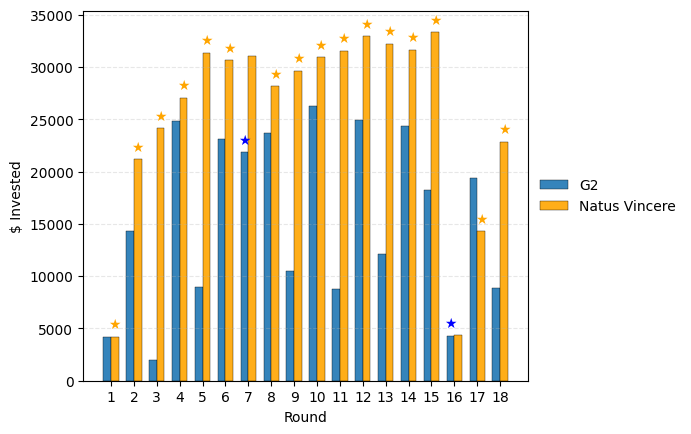

In [10]:
x = np.arange(len(t1_econ)) *1.5

plt.bar(x - 0.25, t1_econ, width=0.5, alpha=0.9, edgecolor="black", linewidth=0.3,
        label=econ_results_filtered.loc[0, "team_1_x"])
plt.bar(x + 0.25, t2_econ, width=0.5, alpha=0.9, edgecolor="black", linewidth=0.3, color="orange",
        label=econ_results_filtered.loc[0, "team_2_x"])

plt.xticks(x, [str(i) for i in range(1, len(t1_econ)+1)])
plt.xlabel("Round")
plt.ylabel("$ Invested")

plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.xticks(x, [str(i) for i in range(1, len(t1_econ)+1)])

plt.margins(y=0.06)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
plt.subplots_adjust(right=0.82)

for i in range(len(t1_econ)):
    winner = econ_results_merged.loc[map -1, f"{i+1}_winner"] 
    if winner == 1:
        plt.text(i*1.5 - 0.25, t1_econ.iloc[i] + 500, "★",
                 ha="center", va="bottom", color="blue")
    elif winner == 2:
        plt.text(i*1.5 + 0.25, t2_econ.iloc[i] + 500, "★",
                 ha="center", va="bottom", color="orange")

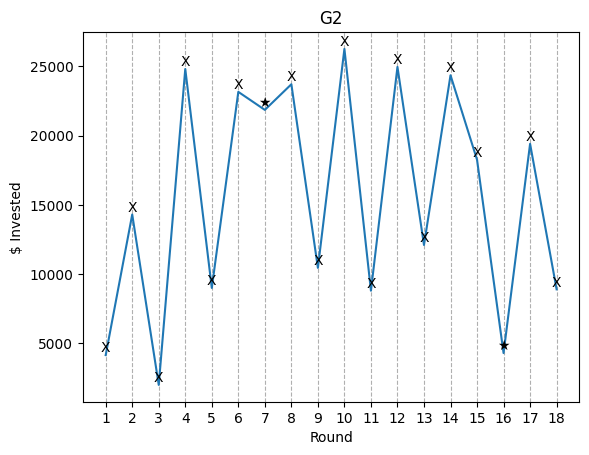

In [11]:
plt.plot(t1_econ)
plt.xlabel("Round")
plt.ylabel("$ Invested")
for i in range(len(t1_econ)):
    winner = econ_results_merged.loc[map -1, f"{i+1}_winner"] 
    if winner == 1:
        plt.text(i, t1_econ.iloc[i], "★",
                 ha="center", va="bottom", color="black")
    elif winner == 2:
        plt.text(i, t1_econ.iloc[i], "X",
                 ha="center", va="bottom", color="black")
plt.title(econ_results_filtered.loc[0, "team_1_x"])

plt.grid(axis="x", linestyle="--", alpha=1)

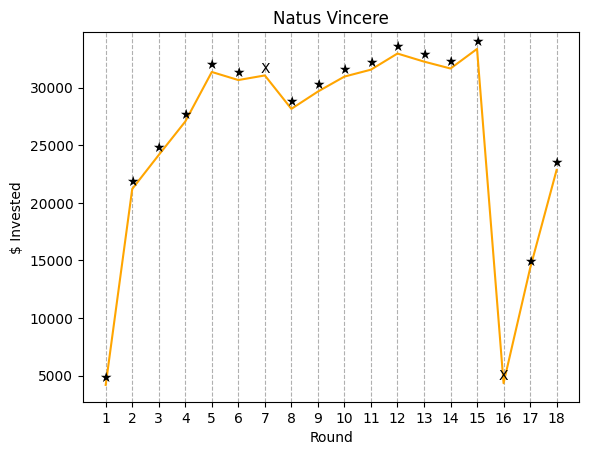

In [12]:
plt.plot(t2_econ, color = "orange")
plt.xlabel("Round")
plt.ylabel("$ Invested")
for i in range(len(t2_econ)):
    winner = econ_results_merged.loc[map -1, f"{i+1}_winner"] 
    if winner == 2:
        plt.text(i, t2_econ.iloc[i], "★",
                 ha="center", va="bottom", color="black")
    elif winner == 1:
        plt.text(i, t2_econ.iloc[i], "X",
                 ha="center", va="bottom", color="black")
plt.title(econ_results_filtered.loc[0, "team_2_x"])

plt.grid(axis="x", linestyle="--", alpha=1)

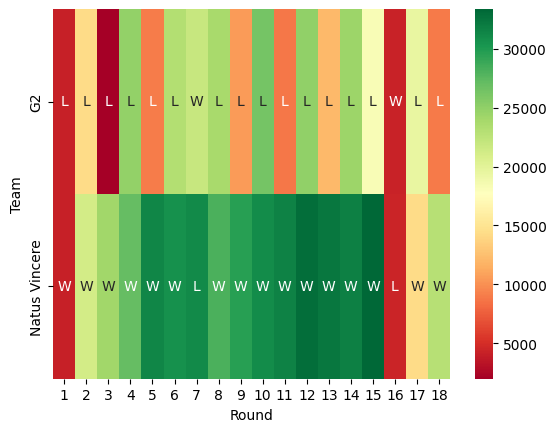

In [13]:
econ_data_arr = np.array([t1_econ, t2_econ]).astype("int")

t1_rounds = []
t2_rounds = []

for i in range(len(round_results)):
    winner = econ_results_merged.loc[map -1, f"{i+1}_winner"] 
    if winner == 1:
        t1_rounds.append("W")
        t2_rounds.append("L")
    elif winner == 2:
        t2_rounds.append("W")
        t1_rounds.append("L")


winners_arr = np.array([t1_rounds, t2_rounds])
y_labels = [econ_results_filtered.loc[0, "team_1_x"], econ_results_filtered.loc[0, "team_2_x"]]
sns.heatmap(econ_data_arr, annot= winners_arr, fmt = "", cmap= "RdYlGn", yticklabels=y_labels, xticklabels = np.arange(len(t1_econ)) +1)
plt.xlabel("Round")
plt.ylabel("Team")
plt.show()

In [14]:
team = "Natus Vincere"
team_t1 = econ_results_merged.query("team_1_x == @team")
team_t2 = econ_results_merged.query("team_2_x == @team")
team_t1_rounds = team_t1.loc[:, t1_cols]
team_t2_rounds = team_t2.loc[:, t2_cols]
team_t1_rounds.columns = team_t1_rounds.columns.str.removesuffix("_t1")
team_t2_rounds.columns = team_t2_rounds.columns.str.removesuffix("_t2")
team_rounds = pd.concat([team_t1_rounds, team_t2_rounds],ignore_index=True)
team_rounds.loc[:, "16"]

0      4000.0
1      4250.0
2      4200.0
3      4200.0
4      4250.0
        ...  
509    4250.0
510    4000.0
511    4050.0
512    4300.0
513    4050.0
Name: 16, Length: 514, dtype: float64

In [34]:

pistol_cols = {1, 16, "1", "16"}
is_pistol_col = team_rounds.columns.isin(pistol_cols)

is_pistol = pd.DataFrame(
    np.tile(is_pistol_col, (len(team_rounds), 1)),
    index=team_rounds.index,
    columns=team_rounds.columns
)

avg_spend = team_rounds / 5

classifiers = pd.DataFrame(
    np.select(
        condlist=[
            is_pistol,                                    
            avg_spend == 0,                               
            (avg_spend > 0) & (avg_spend < 1500),          
            (avg_spend >= 1500) & (avg_spend < 3500),      
            avg_spend >= 3500        
        ],
        choicelist=["pistol", "hard_save", "eco", "force", "full"],
        default= "N/A"
    ),
    index=team_rounds.index, columns=team_rounds.columns
)
classifiers

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,pistol,full,full,full,full,full,full,full,full,full,...,full,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
1,pistol,force,full,full,full,full,full,full,full,full,...,full,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
2,pistol,full,eco,eco,full,full,full,full,force,full,...,full,full,full,full,full,full,full,N/A,N/A,N/A
3,pistol,full,force,eco,full,full,full,full,full,full,...,full,full,full,full,full,force,full,eco,full,N/A
4,pistol,force,full,full,full,eco,full,force,full,full,...,full,full,full,full,N/A,N/A,N/A,N/A,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,pistol,full,force,full,full,full,full,full,full,full,...,force,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
510,pistol,eco,full,eco,full,full,full,force,full,eco,...,full,full,force,eco,full,full,eco,full,force,N/A
511,pistol,eco,force,full,force,eco,force,full,full,full,...,full,full,full,full,full,full,full,full,full,full
512,pistol,eco,force,full,full,full,full,full,full,full,...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


In [31]:
team_rounds

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,4150.0,18050.0,21000.0,25850.0,25000.0,25000.0,27250.0,26150.0,26300.0,27850.0,...,23350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4200.0,10000.0,22000.0,24500.0,27550.0,29350.0,31950.0,31850.0,31750.0,32850.0,...,25900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3550.0,18500.0,3500.0,2900.0,23200.0,24600.0,23650.0,23500.0,17150.0,28800.0,...,30100.0,30700.0,26750.0,30500.0,29550.0,28050.0,30850.0,NaN,NaN,NaN
3,4200.0,20200.0,11500.0,1700.0,22550.0,23850.0,24450.0,21250.0,27650.0,31650.0,...,21800.0,23900.0,24950.0,26350.0,27050.0,11850.0,20850.0,3100.0,26000.0,NaN
4,4200.0,10100.0,25900.0,29300.0,30550.0,6750.0,26100.0,8250.0,29600.0,30800.0,...,18050.0,20350.0,27300.0,23700.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,4250.0,20300.0,17400.0,24300.0,26000.0,25950.0,26050.0,21150.0,24100.0,24550.0,...,13000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,4200.0,1000.0,17900.0,2600.0,25000.0,23950.0,25750.0,16400.0,20600.0,6500.0,...,30350.0,26800.0,13100.0,6900.0,30350.0,29900.0,3350.0,25100.0,12800.0,NaN
511,4300.0,1000.0,15200.0,19500.0,12450.0,1600.0,11350.0,28650.0,31700.0,22000.0,...,26750.0,26850.0,26050.0,24550.0,24250.0,27250.0,26950.0,27650.0,26350.0,27950.0
512,4100.0,1200.0,17350.0,20350.0,21700.0,26350.0,26250.0,28050.0,27350.0,25650.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
